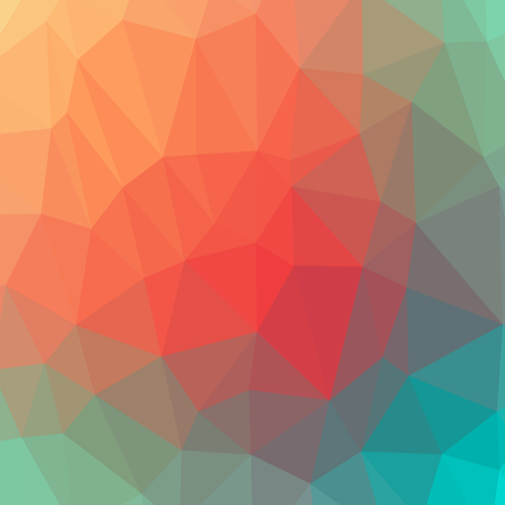

In [0]:
import cv2

from google.colab.patches import cv2_imshow

img = cv2.imread('/content/Hist1.jpg')

#cv2_imshow(img)

res_img = cv2.resize(img, (505, 505)) 

cv2_imshow(res_img)

In [0]:
import numpy as np

sobel_v = (1/8)*np.array([[-1,0,1],[-2,0,2],[-1,0,1]])

sobel_v

array([[-0.125,  0.   ,  0.125],
       [-0.25 ,  0.   ,  0.25 ],
       [-0.125,  0.   ,  0.125]])

In [0]:
sobel_h = sobel_v.T

sobel_h

array([[-0.125, -0.25 , -0.125],
       [ 0.   ,  0.   ,  0.   ],
       [ 0.125,  0.25 ,  0.125]])

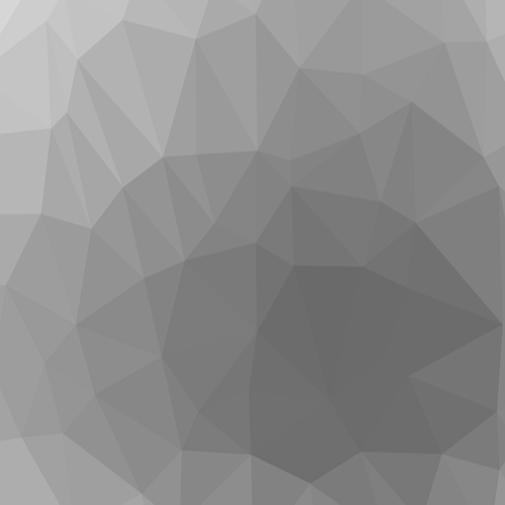

In [0]:
gray = cv2.cvtColor(res_img,cv2.COLOR_BGR2GRAY)
cv2_imshow(gray)

505 505


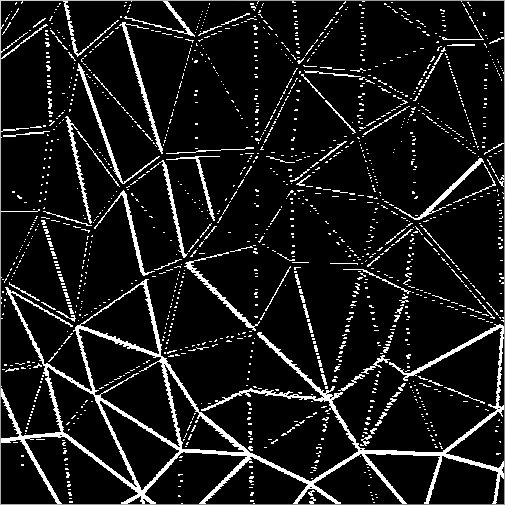

In [0]:
import copy

gray = cv2.cvtColor(res_img,cv2.COLOR_BGR2GRAY)
#cv2_imshow(gray)

r,c = gray.shape
print(r,c)

gray_new  = copy.deepcopy(gray)

for i in range(1,r-1):
  
  for j in range(1,c-1):
    
    temparray = np.zeros((3,3))
    
    temparray[0][0] = gray[i-1][j-1]  
    temparray[0][1] = gray[i-1][j] 
    temparray[0][2] = gray[i-1][j+1]
    temparray[1][0] = gray[i][j-1]
    temparray[1][1] = gray[i][j]
    temparray[1][2] = gray[i][j+1]
    temparray[2][0] = gray[i+1][j-1]
    temparray[2][1] = gray[i+1][j]
    temparray[2][2] = gray[i+1][j+1]
    
    tempInt = sum(sum(np.multiply(temparray,sobel_h)))
    
    if tempInt<=0.05:
      tempInt = 0
#       print('if')
    else:
      tempInt = 255
#       print('else')
    
    gray_new[i][j] = tempInt
    

cv2_imshow(gray_new)


505 505


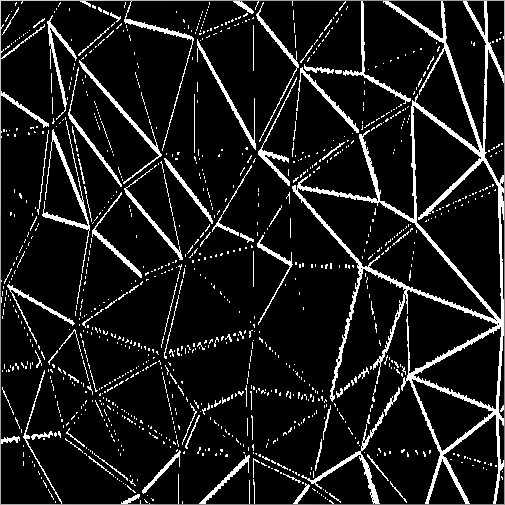

In [0]:
import copy

gray = cv2.cvtColor(res_img,cv2.COLOR_BGR2GRAY)
#cv2_imshow(gray)

r,c = gray.shape
print(r,c)

gray_new  = copy.deepcopy(gray)

for i in range(1,r-1):
  
  for j in range(1,c-1):
    
    temparray = np.zeros((3,3))
    
    temparray[0][0] = gray[i-1][j-1]  
    temparray[0][1] = gray[i-1][j] 
    temparray[0][2] = gray[i-1][j+1]
    temparray[1][0] = gray[i][j-1]
    temparray[1][1] = gray[i][j]
    temparray[1][2] = gray[i][j+1]
    temparray[2][0] = gray[i+1][j-1]
    temparray[2][1] = gray[i+1][j]
    temparray[2][2] = gray[i+1][j+1]
    
    tempInt = sum(sum(np.multiply(temparray,sobel_v)))
    
    if tempInt <= 0.1:
      tempInt = 0
#       print('if')
    else:
      tempInt = 255
#       print('else')
    
    gray_new[i][j] = tempInt
    

cv2_imshow(gray_new)


In [0]:
import numpy as np

a = [[1,2,3],[3,4,5],[1,2,3]]
b = [[0,0,0],[0,1,0],[0,0,0]]

print(np.multiply(a,b),a[0][1],np.zeros((3,3)))
print(np.dot(a,b))
print(sobel_v,sobel_h)

print('Slicing')
print(gray[1:3,1:3])
print(gray[1][1],gray[2][2])

[[0 0 0]
 [0 4 0]
 [0 0 0]] 2 [[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]
[[0 2 0]
 [0 4 0]
 [0 2 0]]
[[-0.125  0.     0.125]
 [-0.25   0.     0.25 ]
 [-0.125  0.     0.125]] [[-0.125 -0.25  -0.125]
 [ 0.     0.     0.   ]
 [ 0.125  0.25   0.125]]
Slicing
[[214 214]
 [214 214]]
214 214


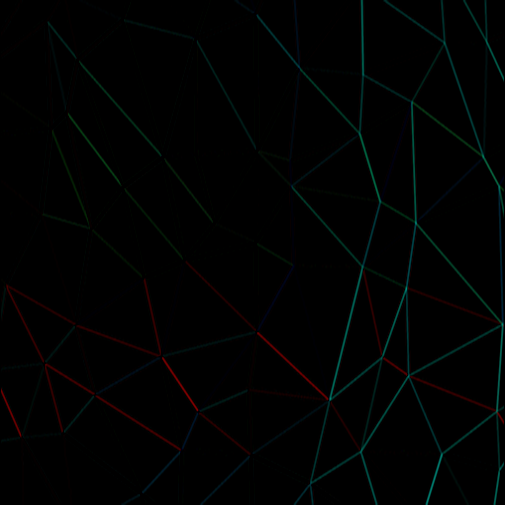

In [0]:
sobely = cv2.Sobel(res_img,cv2.CV_64F,1,0,ksize =3)

cv2_imshow(sobely)

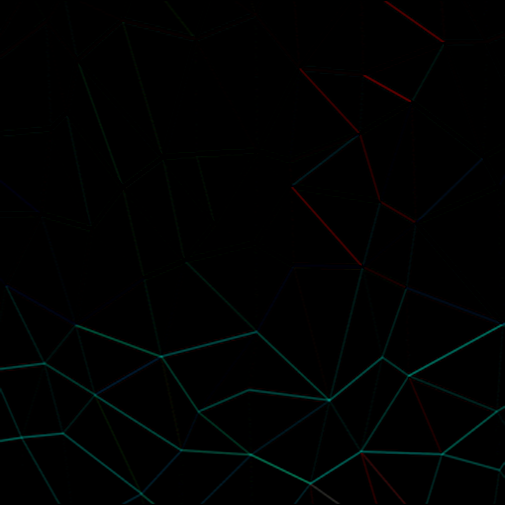

In [0]:
sobelx = cv2.Sobel(res_img,cv2.CV_64F,0,1,ksize =3)

cv2_imshow(sobelx)

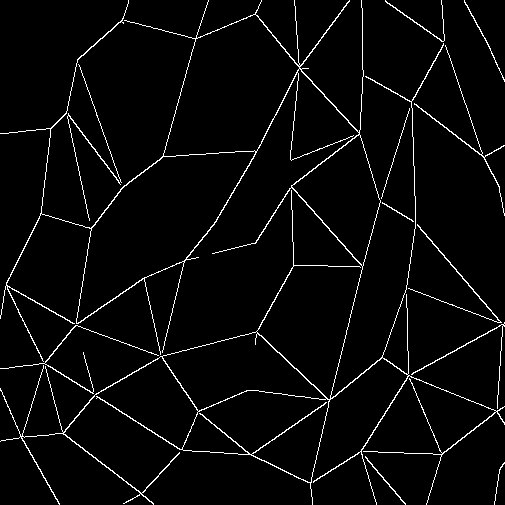

In [0]:
canny = cv2.Canny(res_img,50,100)
cv2_imshow(canny)

In [0]:
#lines.shape

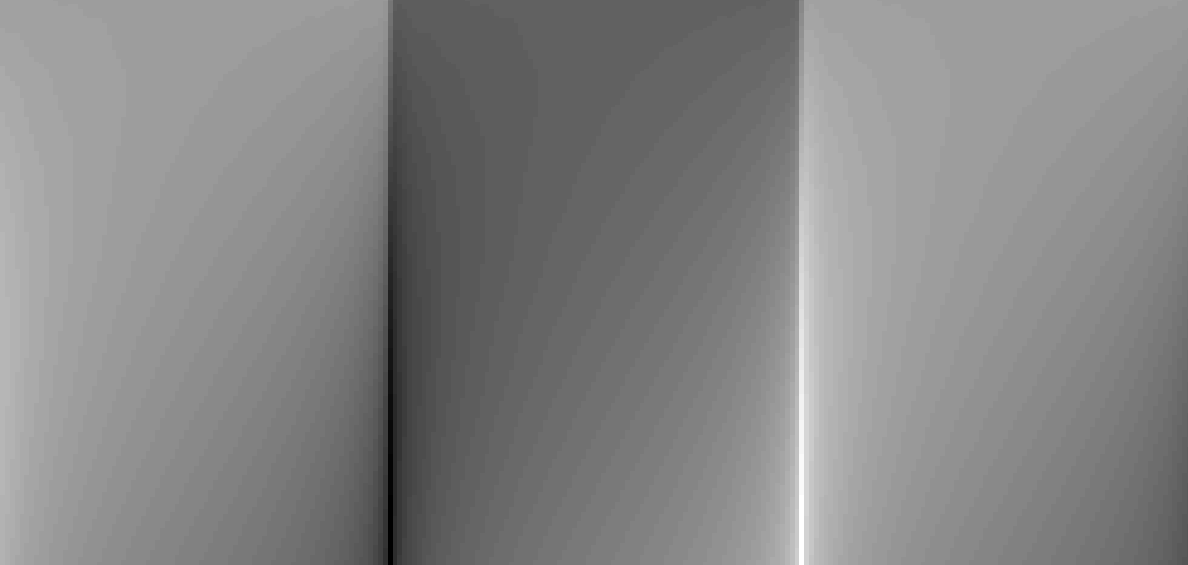

(2, 1, 4)


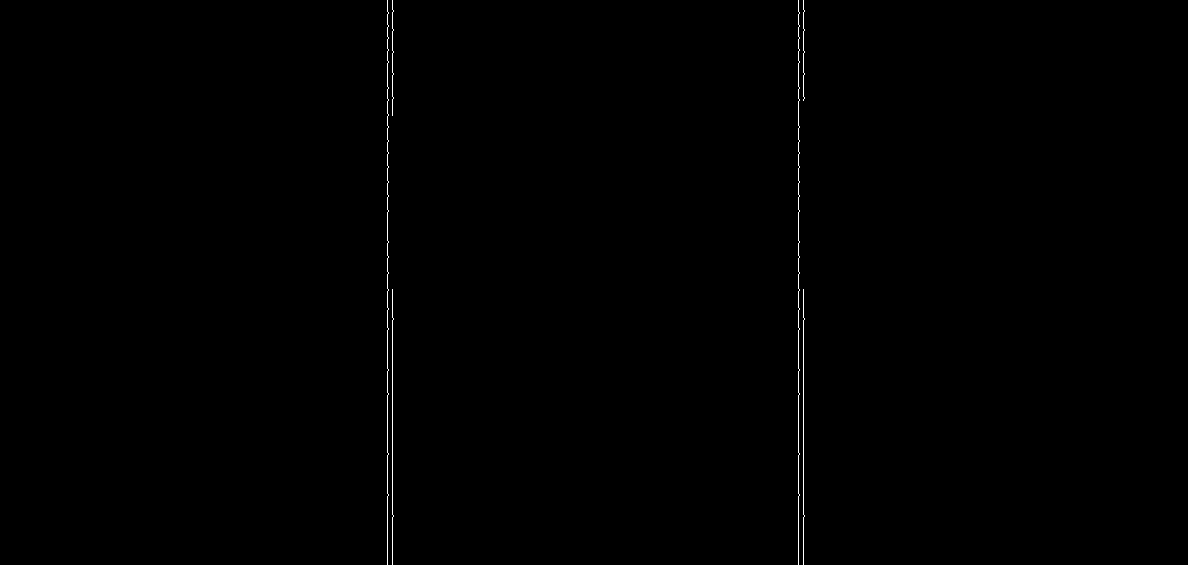

[[392 514 392 320]
 [803 514 803 320]]


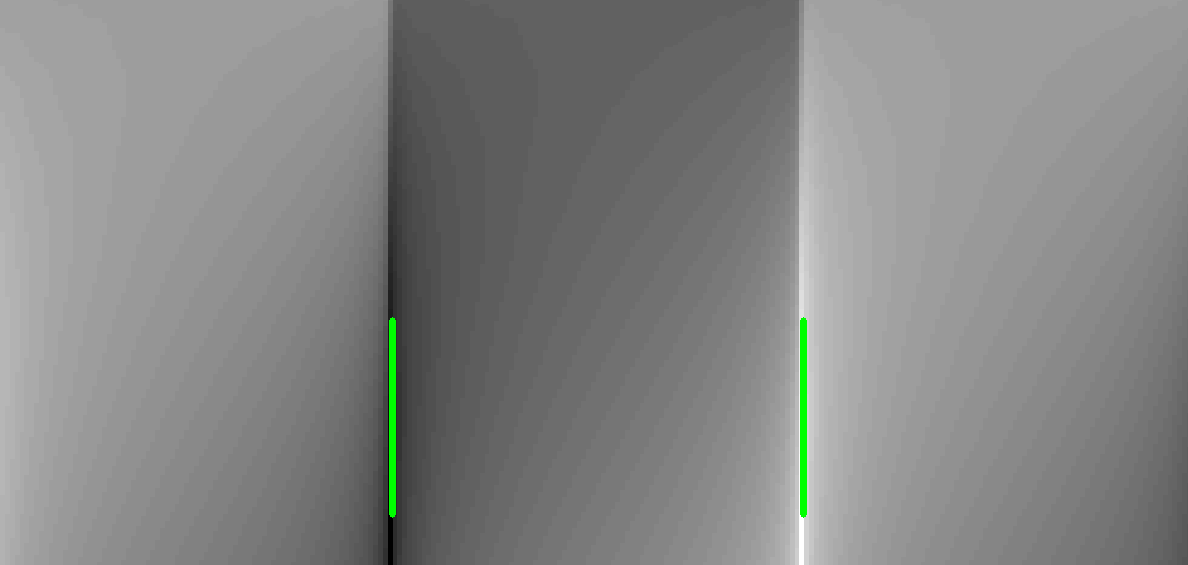

In [0]:
import cv2
import numpy as np

img = cv2.imread('/content/Hist3.png')
cv2_imshow(img)
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
edges = cv2.Canny(gray,50,80,apertureSize = 3)

minLineLength = 100
maxLineGap = 100

lines = cv2.HoughLinesP(edges,1,np.pi/45,100,minLineLength,maxLineGap)
print(lines.shape)
lines = lines.reshape(2,4)
for x1,y1,x2,y2 in lines:
    cv2.line(img,(x1,y1),(x2,y2),(0,255,0),5)

cv2_imshow(edges)
# lines = cv2.HoughLinesP(edges,1,np.pi/90,10,minLineLength,maxLineGap)
print(lines)
cv2_imshow(img)

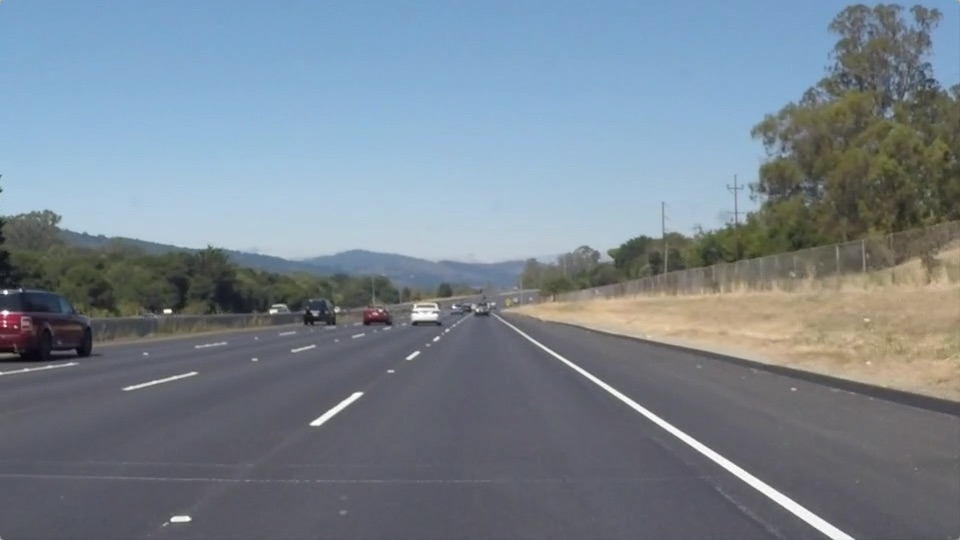

(15, 4)


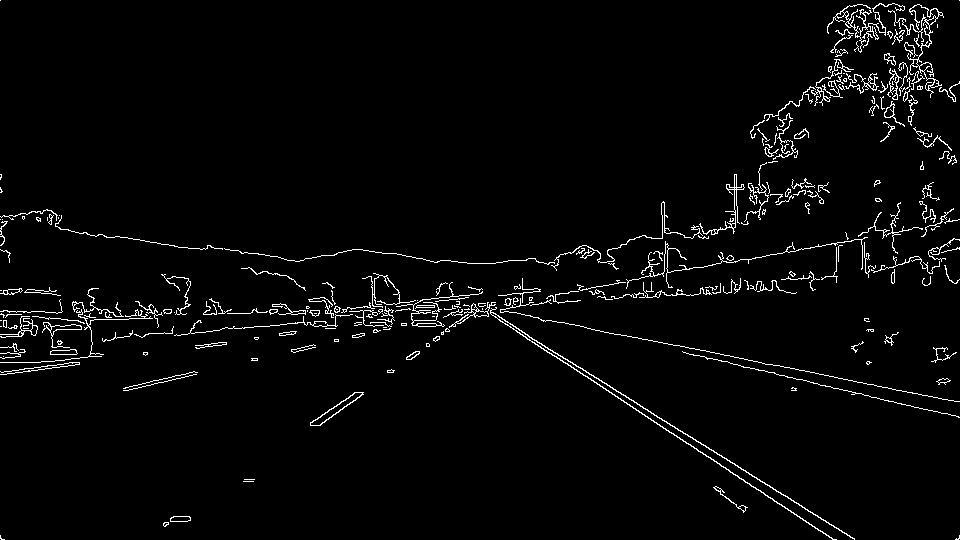

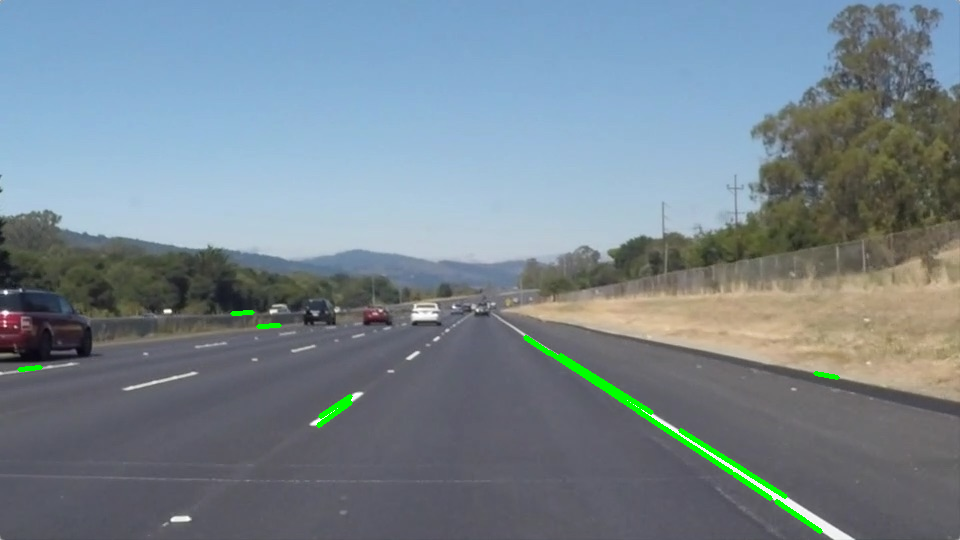

In [0]:
import cv2
import numpy as np

img = cv2.imread('/content/Hist4.jpg')
cv2_imshow(img)
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
edges = cv2.Canny(gray,50,150,apertureSize = 3)

minLineLength = 20
maxLineGap = 20

lines = cv2.HoughLinesP(edges,1,np.pi/180,100,minLineLength,maxLineGap)
lines = lines.reshape(lines.shape[0],lines.shape[2])

print(lines.shape)

for x1,y1,x2,y2 in lines:
    cv2.line(img,(x1,y1),(x2,y2),(0,255,0),3)

cv2_imshow(edges)
# lines = cv2.HoughLinesP(edges,1,np.pi/90,10,minLineLength,maxLineGap)

cv2_imshow(img)

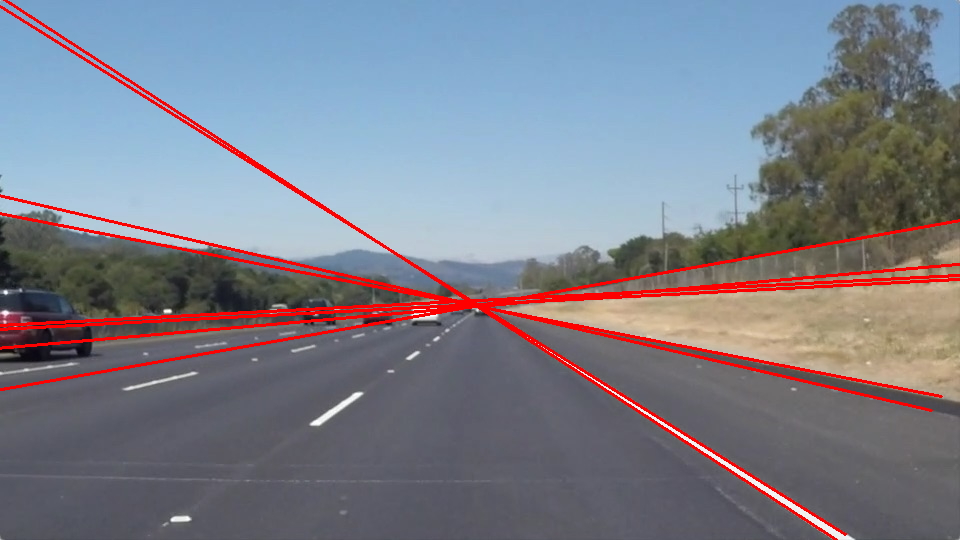

In [0]:
import cv2
import numpy as np

img = cv2.imread('/content/Hist4.jpg')
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
edges = cv2.Canny(gray,50,150,apertureSize = 3)
lines = cv2.HoughLines(edges,1,np.pi/180,200)

lines = lines.reshape(lines.shape[0],lines.shape[2])
for rho,theta in lines:
    a = np.cos(theta)
    b = np.sin(theta)
    x0 = a*rho
    y0 = b*rho
    x1 = int(x0 + 1000*(-b))
    y1 = int(y0 + 1000*(a))
    x2 = int(x0 - 1000*(-b))
    y2 = int(y0 - 1000*(a))

    cv2.line(img,(x1,y1),(x2,y2),(0,0,255),2)

cv2_imshow(img)